In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_columns", 900)
plt.style.use("ggplot")

In [126]:
df = pd.read_csv('/content/drive/MyDrive/kaggle_datasets/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#Data Analysis

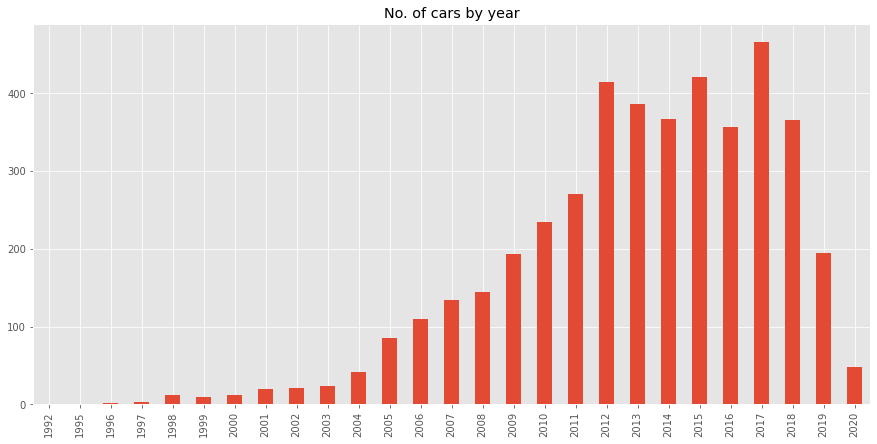

In [127]:
# No. of cars by year
df['year'].value_counts().sort_index().plot(kind='bar',figsize=(15,7),title='No. of cars by year')
plt.show()

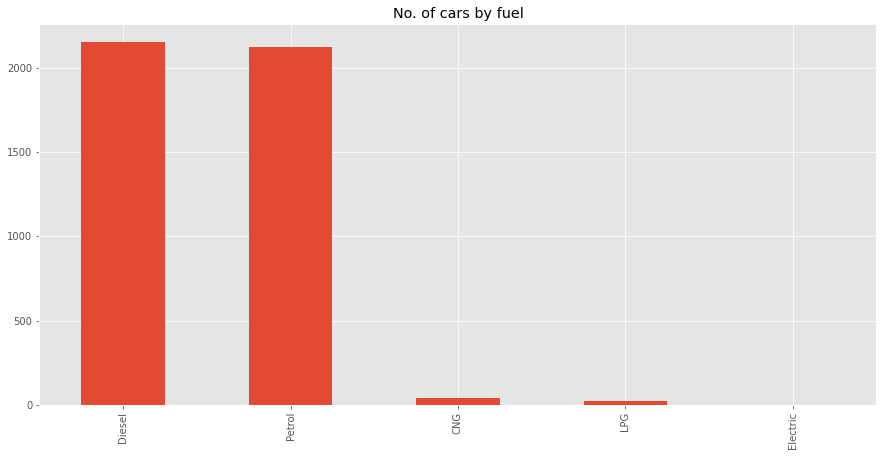

In [128]:
#no. of cars by fuel
df['fuel'].value_counts().plot(kind='bar',figsize=(15,7),title='No. of cars by fuel')
plt.show()

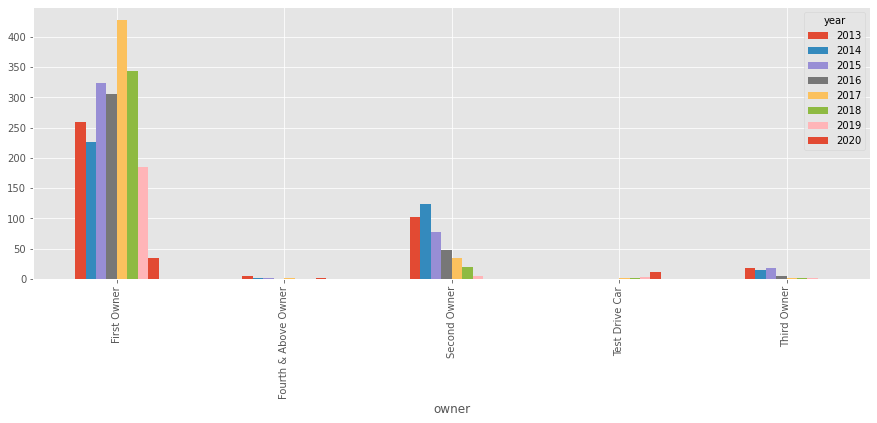

In [129]:
# Owner for past 10 years
df_owner = df.query('year > 2012')
df_owner = (df_owner.groupby('year')['owner'].value_counts().sort_index().unstack())
df_owner.T.plot(kind='bar',figsize=(15,5))
plt.show()

In [130]:
df.groupby('year')['owner'].value_counts().unstack().fillna(0).astype('int').style.background_gradient(cmap='Greens')

owner,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
year,,,,,
1992,0,1,0,0,0
1995,0,0,1,0,0
1996,1,0,1,0,0
1997,1,0,1,0,1
1998,0,3,6,0,3
1999,1,3,5,0,1
2000,4,2,4,0,2
2001,5,1,6,0,8
2002,7,3,6,0,5


In [131]:
# Scatter plot using plotly
px.scatter(data_frame=df,x='selling_price',color='name')


In [132]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [133]:
df.shape

(4340, 8)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [135]:
df['name'].duplicated().sum()

2849

In [136]:
# Checking value_counts of columns
cols = ['fuel','seller_type','transmission','owner']
for col in cols:
  print(f'{col}-------------------->\n{df[col].value_counts()}\n')

fuel-------------------->
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

seller_type-------------------->
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

transmission-------------------->
Manual       3892
Automatic     448
Name: transmission, dtype: int64

owner-------------------->
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64



# Preprocessing


In [137]:
def preprocessing(data):
  data = data.copy()
  data['name'] = data['name'].apply(lambda x : x.split()[0]) # Taking only brand name and removing model names
  counts = data['name'].value_counts()
  data = data.loc[data['name'].isin(counts.index[counts > 30])] # Removing cars less than 30 in value_counts()
  count_fuel = data['fuel'].value_counts()
  data = data.loc[data['fuel'].isin(count_fuel.index[count_fuel > 3])] # Removing Electric from fuel type as haviing only 1 value
  data['seller_type'] = data['seller_type'].apply(lambda x : 'Dealer' if x == 'Trustmark Dealer' else x ) # Converting Trustmark Dealer to Dealer for ease of modeling
  # One Hot Encoding
  OneHotCols = ['name','fuel','seller_type','transmission','owner']
  for col in OneHotCols :
    dummies = pd.get_dummies(data[col], prefix = col)
    data = pd.concat([data, dummies], axis = 1)
    data = data.drop(col, axis=1)
  # Splitting Data
  X = data.drop('selling_price', axis = 1)
  Y = data['selling_price']
  # Training
  x_train, x_test,y_train, y_test = train_test_split(X,Y, test_size = .30, shuffle = True, random_state = 1)
  # Scaling Data
  scaler = StandardScaler()
  scaler.fit(x_train)
  x_train = pd.DataFrame(scaler.transform(x_train), index = x_train.index, columns  = x_train.columns)
  x_test = pd.DataFrame(scaler.transform(x_test), index = x_test.index, columns  = x_test.columns)
  return x_train, x_test, y_train, y_test

In [138]:
x_train, x_test, y_train, y_test = preprocessing(df)

In [139]:
x_train

,year,km_driven,name_Audi,name_BMW,name_Chevrolet,name_Datsun,name_Fiat,name_Ford,name_Honda,name_Hyundai,name_Mahindra,name_Maruti,name_Mercedes-Benz,name_Nissan,name_Renault,name_Skoda,name_Tata,name_Toyota,name_Volkswagen,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
4134,0.449273,0.506873,-0.123154,-0.091486,-0.219127,-0.08772,-0.100301,-0.236856,-0.243047,-0.486265,-0.311237,1.535532,-0.079675,-0.125903,-0.190988,-0.124536,-0.297563,-0.227324,-0.157602,-0.087720,1.025559,-0.07534,-0.998673,-0.585529,0.585529,-0.335052,0.335052,0.718760,-0.143774,-0.571216,-0.070746,-0.273062
4098,-0.023134,-0.185536,-0.123154,-0.091486,-0.219127,-0.08772,-0.100301,-0.236856,4.114435,-0.486265,-0.311237,-0.651240,-0.079675,-0.125903,-0.190988,-0.124536,-0.297563,-0.227324,-0.157602,-0.087720,-0.975078,-0.07534,1.001329,1.707857,-1.707857,-0.335052,0.335052,0.718760,-0.143774,-0.571216,-0.070746,-0.273062
1534,0.685477,-0.341485,-0.123154,-0.091486,-0.219127,-0.08772,-0.100301,-0.236856,-0.243047,-0.486265,-0.311237,1.535532,-0.079675,-0.125903,-0.190988,-0.124536,-0.297563,-0.227324,-0.157602,-0.087720,1.025559,-0.07534,-0.998673,-0.585529,0.585529,-0.335052,0.335052,0.718760,-0.143774,-0.571216,-0.070746,-0.273062
4116,-0.259338,0.506873,-0.123154,-0.091486,-0.219127,-0.08772,-0.100301,-0.236856,-0.243047,-0.486265,-0.311237,1.535532,-0.079675,-0.125903,-0.190988,-0.124536,-0.297563,-0.227324,-0.157602,-0.087720,-0.975078,-0.07534,1.001329,-0.585529,0.585529,-0.335052,0.335052,-1.391284,-0.143774,1.750651,-0.070746,-0.273062
1737,-1.912763,0.082694,-0.123154,-0.091486,-0.219127,-0.08772,-0.100301,-0.236856,-0.243047,2.056494,-0.311237,-0.651240,-0.079675,-0.125903,-0.190988,-0.124536,-0.297563,-0.227324,-0.157602,-0.087720,-0.975078,-0.07534,1.001329,-0.585529,0.585529,-0.335052,0.335052,0.718760,-0.143774,-0.571216,-0.070746,-0.273062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,-0.259338,0.082694,-0.123154,-0.091486,-0.219127,-0.08772,-0.100301,-0.236856,-0.243047,-0.486265,-0.311237,1.535532,-0.079675,-0.125903,-0.190988,-0.124536,-0.297563,-0.227324,-0.157602,-0.087720,1.025559,-0.07534,-0.998673,-0.585529,0.585529,-0.335052,0.335052,-1.391284,-0.143774,1.750651,-0.070746,-0.273062
2785,1.394087,-1.189843,-0.123154,-0.091486,-0.219127,-0.08772,-0.100301,-0.236856,-0.243047,2.056494,-0.311237,-0.651240,-0.079675,-0.125903,-0.190988,-0.124536,-0.297563,-0.227324,-0.157602,11.399847,-0.975078,-0.07534,-0.998673,-0.585529,0.585529,-0.335052,0.335052,0.718760,-0.143774,-0.571216,-0.070746,-0.273062
912,-1.912763,-0.201930,-0.123154,-0.091486,-0.219127,-0.08772,-0.100301,-0.236856,-0.243047,2.056494,-0.311237,-0.651240,-0.079675,-0.125903,-0.190988,-0.124536,-0.297563,-0.227324,-0.157602,-0.087720,-0.975078,-0.07534,1.001329,1.707857,-1.707857,-0.335052,0.335052,0.718760,-0.143774,-0.571216,-0.070746,-0.273062
4014,-0.495541,-0.553575,-0.123154,-0.091486,-0.219127,-0.08772,-0.100301,-0.236856,-0.243047,-0.486265,-0.311237,1.535532,-0.079675,-0.125903,-0.190988,-0.124536,-0.297563,-0.227324,-0.157602,-0.087720,-0.975078,-0.07534,1.001329,-0.585529,0.585529,-0.335052,0.335052,-1.391284,-0.143774,1.750651,-0.070746,-0.273062


# Modeling

In [151]:
models = {
    'Gradient Bossting Regressor' : GradientBoostingRegressor(),
    'Random Forest Regressor'     : RandomForestRegressor(max_depth = 6),
}

In [152]:
for name, model in models.items():
  model.fit(x_train, y_train)
  print(f'{name} Model Trained!')
  y_pred = model.predict(x_test)
  print(f'Trainset Acurracy Score of {name} : {round(model.score(x_train, y_train), 3)*100}%')
  print(f'Testset Acurracy Score of {name} : {round(model.score(x_test, y_test), 3)*100}%\n\n')

Gradient Bossting Regressor Model Trained!
Trainset Acurracy Score of Gradient Bossting Regressor : 88.1%
Testset Acurracy Score of Gradient Bossting Regressor : 78.3%


Random Forest Regressor Model Trained!
Trainset Acurracy Score of Random Forest Regressor : 86.7%
Testset Acurracy Score of Random Forest Regressor : 74.4%




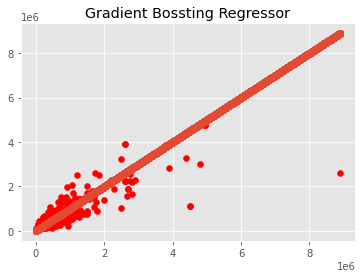

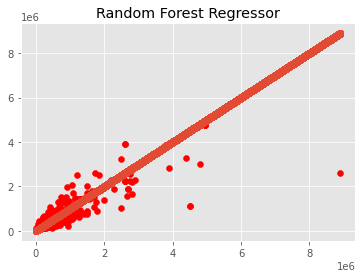

In [157]:
for name, model in models.items():
  if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
  else:my_range = int(max(y_pred))
  plt.scatter(y_test, y_pred, color='red')
  plt.plot(range(my_range), range(my_range), 'o')
  plt.title(name)
  plt.show()


In [165]:
for name, model in models.items():
  y_pred = model.predict(x_test)
  rmse = np.sqrt(np.mean(y_test - y_pred)**2)
  print(rmse)

1270.3133752400468
914.3581795549723
